Atmospheres
-----------

This notebook demonstrates how to create objects and plot some the density-depth relation of atmospheres using the density classes directly. The code will produce Figure 4 from the proceedings.

In [1]:
#standard imports
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import matplotlib.pyplot as plt
os.chdir('..')
#just import the density_profile module to test the classes
from MCEq.density_profiles import *

Create instances of the atmospheric objects and plot.

In [2]:
us_obj = CorsikaAtmosphere('BK_USStd', None)
sps_obj = CorsikaAtmosphere('PL_SouthPole', 'January')
spw_obj = CorsikaAtmosphere('PL_SouthPole', 'August')
msps_obj = MSIS00Atmosphere('SouthPole', 'January')
mspw_obj = MSIS00Atmosphere('SouthPole', 'August')

CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.03s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.03s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.03s
MSIS00Atmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.11s
MSIS00Atmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 0.0 degrees.
.. took 0.11s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 70.0 degrees.
.. took 0.03s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 70.0 degrees.
.. took 0.04s
CorsikaAtmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 70.0 degrees.
.. took 0.05s
MSIS00Atmosphere::calculate_density_spline(): Calculating spline of rho(X) for zenith 7

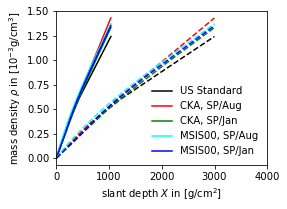

In [7]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
# set_theta will trigger integration and cache look-up 
us_obj.set_theta(0.0)
sps_obj.set_theta(0.0)
spw_obj.set_theta(0.0)
msps_obj.set_theta(0.0)
mspw_obj.set_theta(0.0)

# obtain the depth value corresponding to the surface from obj.X_surf 
x_vec = np.linspace(0, us_obj.max_X, 10000) 
plt.plot(x_vec, 1e3 / us_obj.r_X2rho(x_vec),label='US Standard',lw=1.5,color='black')
plt.plot(x_vec, 1e3 / spw_obj.r_X2rho(x_vec),label='CKA, SP/Aug',lw=1.5,color='red')
plt.plot(x_vec, 1e3 / sps_obj.r_X2rho(x_vec),label='CKA, SP/Jan',lw=1.5,color='green')
plt.plot(x_vec, 1e3 / mspw_obj.r_X2rho(x_vec),label='MSIS00, SP/Aug',lw=1.5,color='cyan')
plt.plot(x_vec, 1e3 / msps_obj.r_X2rho(x_vec),label='MSIS00, SP/Jan',lw=1.5,color='blue')

us_obj.set_theta(70.0)
sps_obj.set_theta(70.0)
spw_obj.set_theta(70.0)
msps_obj.set_theta(70.0)
mspw_obj.set_theta(70.0)
x_vec = np.linspace(0, us_obj.max_X, 10000)
plt.plot(x_vec, 1e3 / us_obj.r_X2rho(x_vec),label='_nolabel_',lw=1.5, ls='--', color='black')
plt.plot(x_vec, 1e3 / spw_obj.r_X2rho(x_vec),label='_nolabel_',lw=1.5, ls='--', color='red')
plt.plot(x_vec, 1e3 / sps_obj.r_X2rho(x_vec),label='_nolabel_',lw=1.5, ls='--', color='green')
plt.plot(x_vec, 1e3 / mspw_obj.r_X2rho(x_vec),label='_nolabel_',lw=1.5, ls='--', color='cyan')
plt.plot(x_vec, 1e3 / msps_obj.r_X2rho(x_vec),label='_nolabel_',lw=1.5, ls='--', color='blue')
plt.xlim([0,4000])
plt.legend(loc='lower right', frameon=False, fontsize=10)

plt.xlabel('slant depth $X$ in [g/cm$^2$]')
plt.ylabel(r'mass density $\rho$ in [10$^{-3}$g/cm$^3$]')
plt.tight_layout()
# plt.savefig('rho_X.pdf')